# Submitted By Gomathy Sankar K
## Task 1
### Prediction of Student Scores by the number of study hours

#### Loading in the Required Datasets

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline

#### Reading in the Student Scores Dataset

In [3]:
student_scores = pd.read_csv('E:\Data Science in Python\GRIP Tasks\student_scores - student_scores.csv')

In [4]:
student_scores

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Exploratory Data Analysis

Text(0.5, 1.0, 'Hours vs Scores')

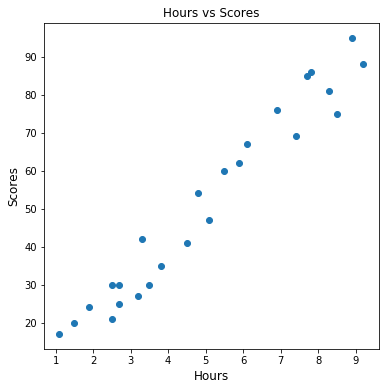

In [5]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(student_scores['Hours'], student_scores['Scores'])
ax.set_xlabel('Hours', fontsize = 12)
ax.set_ylabel('Scores', fontsize = 12)
ax.set_title('Hours vs Scores')

From the above scatter plot we can see that there is a linear relationship between the number of study hours and the scores obtained.

#### Preparing the Training and Test Datasets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(student_scores['Hours'].values, student_scores['Scores'].values, 
                                                    random_state = 1)
X_train = X_train.reshape(-1, 1)
y_train = y_train
X_test = X_test.reshape(-1, 1)
y_test = y_test

#### Fitting a Linear Regression Model to the Dataset

In [7]:
fit_model = LinearRegression().fit(X_train, y_train)

In [8]:
test_predictions = fit_model.predict(X_test)
Test_df = pd.DataFrame({'Actual Scores' : y_test[:], 'Predicted Scores' : test_predictions[:]})
Test_df

,Actual Scores,Predicted Scores
0,17,10.151901
1,42,32.739761
2,24,18.365669
3,75,86.129249
4,54,48.140575
5,85,77.915481
6,67,61.487947


In [9]:
import sklearn as sk
import math
mse_error = sk.metrics.mean_squared_error(Test_df['Actual Scores'], Test_df['Predicted Scores'])
print('The Root Mean Squared Error is {}.'.format(math.sqrt(mse_error)))

The Root Mean Squared Error is 7.589093096841797.


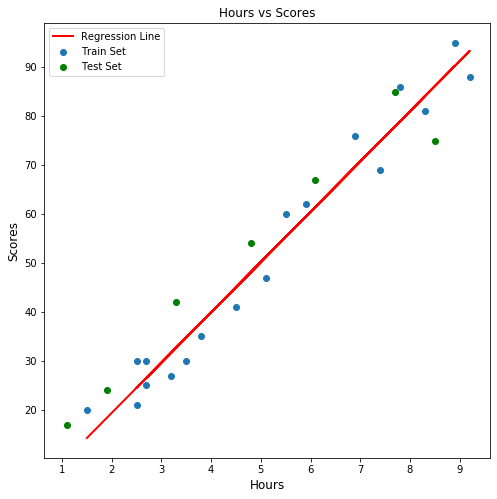

In [10]:
fig1, ax1 = plt.subplots(figsize = (8, 8))
ax1.scatter(X_train, y_train, label = 'Train Set')
ax1.scatter(X_test, y_test, color = 'green', label = 'Test Set')
ax1.set_xlabel('Hours', fontsize = 12)
ax1.set_ylabel('Scores', fontsize = 12)
ax1.set_title('Hours vs Scores')
ax1.plot(X_train, fit_model.intercept_ + (fit_model.coef_ * X_train), color = 'red', linewidth = 2, label = 'Regression Line')
ax1.legend(loc = 'upper left')

#### Score Prediction for the Required Hours 

In [11]:
Reqd_Hours = np.array(9.25).reshape(1, -1)
Predicted_Score = fit_model.predict(Reqd_Hours)
Predicted_Score[0]

93.82965552496633

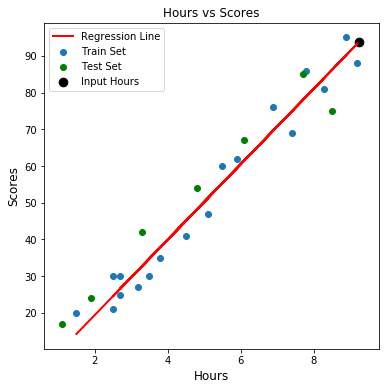

In [12]:
fig2, ax2 = plt.subplots(figsize = (6, 6))
ax2.scatter(X_train, y_train, label = 'Train Set')
ax2.scatter(X_test, y_test, color = 'green', label = 'Test Set')
ax2.set_xlabel('Hours', fontsize = 12)
ax2.set_ylabel('Scores', fontsize = 12)
ax2.set_title('Hours vs Scores')
ax2.plot(X_train, fit_model.predict(X_train), color = 'red', linewidth = 2, label = 'Regression Line')
ax2.scatter(Reqd_Hours, Predicted_Score[0], color = 'black', s = 75, label = 'Input Hours')
ax2.legend(loc = 'upper left')

### Thank You